# Linear Regrssion on US Housing Price

## Linear regression primer

In statistics, linear regression is a linear approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

Linear regression models are often fitted using the least squares approach, but they may also be fitted in other ways, such as by minimizing the "lack of fit" in some other norm (as with least absolute deviations regression), or by minimizing a penalized version of the least squares loss function as in ridge regression ($L_2$-norm penalty) and lasso ($L_1$-norm penalty). Conversely, the least squares approach can be used to fit models that are not linear models. Thus, although the terms "least squares" and "linear model" are closely linked, they are not synonymous.

### Import packages and dataset

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('USA_Housing.csv')

In [3]:
df.shape

(5000, 7)

In [4]:
#Read the data
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

### Check basic info on the data set

**'info()' method to check the data types and number**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**'describe()' method to get the statistical summary of the various features of the data set**

In [7]:
# Describe
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**'columns' method to get the names of the columns (features)**

In [8]:
#Columns
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### Basic plotting and visualization on the data set

**Pairplots using seaborn**

In [9]:
#pair plot
#sns.pairplot(df)

### Can you explain the diagonal plots in the above grid?

**Distribution of price (the predicted quantity)**

(array([  3.,   5.,  16.,  28.,  47.,  87., 155., 233., 305., 368., 504.,
        527., 563., 509., 462., 403., 283., 193., 146.,  82.,  36.,  23.,
         14.,   7.,   1.]),
 array([  15938.65792329,  114063.73537334,  212188.8128234 ,
         310313.89027346,  408438.96772351,  506564.04517357,
         604689.12262363,  702814.20007368,  800939.27752374,
         899064.3549738 ,  997189.43242385, 1095314.50987391,
        1193439.58732397, 1291564.66477402, 1389689.74222408,
        1487814.81967414, 1585939.89712419, 1684064.97457425,
        1782190.05202431, 1880315.12947436, 1978440.20692442,
        2076565.28437448, 2174690.36182453, 2272815.43927459,
        2370940.51672465, 2469065.5941747 ]),
 <BarContainer object of 25 artists>)

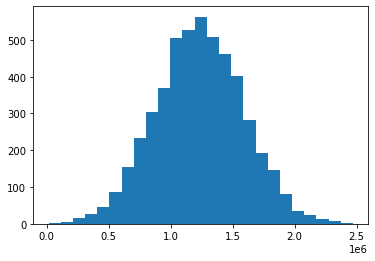

In [10]:
#Histogram price
plt.hist(df['Price'],bins=25)

**Correlation matrix and heatmap**

In [43]:
pip install pandas-profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27091 sha256=4a9c1c3e13bacfa440772ad72f73fb2dbb416c2b6274cf2979bef3d60bc9c898
  Stored in directory: c:\users\win10\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:
      Successfully uninstalled joblib-0.17.0
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.0
    Uninstalling statsmodels-0.12.0:
      Successfully uninstalled statsmodels-0.12.0
Note: you may need to restart the kernel to use upda

In [46]:
from pandas_profiling import ProfileReport
profile=ProfileReport(df, title='apple')
profile

In [11]:
#Correlation matrix
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

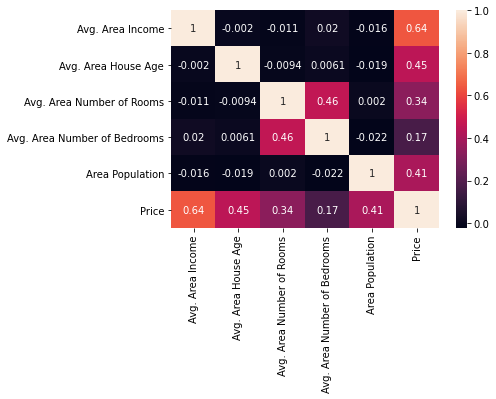

In [12]:
#Heat map
sns.heatmap(df.corr(),annot=True)

### Feature and variable sets

**Make a list of data frame column names**

**Put all the numerical features in X and Price in y, ignore Address which is string for linear regression**

In [13]:
#X = df.loc[:, df.columns != [['Price','Address']]]
X = df.loc[:, ~df.columns.isin(['Price', 'Address'])]
y = df['Price']

In [14]:
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)

Feature set size: (5000, 5)
Variable set size: (5000,)


In [15]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [16]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

### Test-train split

In [17]:
X1=df.loc[:, ~df.columns.isin(['Address'])]
y1=df.Price

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size=0.3)

In [23]:
X_train1.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
1358,71227.388815,6.996436,8.006614,4.21,20096.291417,1.455692e+06
4814,82389.522278,5.012767,7.155825,4.29,32494.139681,1.299925e+06
3352,66461.466687,5.705861,5.783416,3.38,26052.737827,7.297816e+05
3195,82851.730207,4.865251,6.773178,2.22,33366.274639,1.232974e+06
411,36100.444227,5.778489,5.497450,2.29,44901.857338,5.995040e+05


(array([ 39., 135., 405., 742., 895., 746., 387., 124.,  26.,   1.]),
 array([ 3.95022469,  4.63116105,  5.31209742,  5.99303378,  6.67397015,
         7.35490651,  8.03584288,  8.71677924,  9.39771561, 10.07865197,
        10.75958834]),
 <BarContainer object of 10 artists>)

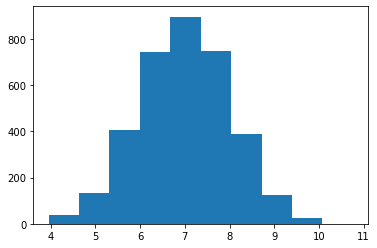

In [27]:
plt.hist(X_train1['Avg. Area Number of Rooms'])
#X_train1.head()

(array([  1.,  17.,  60., 189., 328., 445., 289., 129.,  35.,   7.]),
 array([ 3.23619402,  3.94057686,  4.6449597 ,  5.34934254,  6.05372538,
         6.75810822,  7.46249106,  8.1668739 ,  8.87125674,  9.57563958,
        10.28002242]),
 <BarContainer object of 10 artists>)

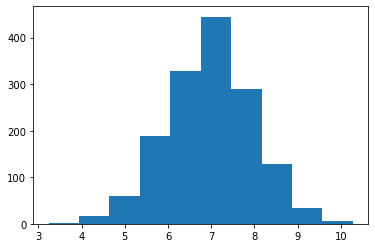

In [26]:
plt.hist(X_test1['Avg. Area Number of Rooms'])

(array([ 19.,  75., 307., 607., 908., 813., 516., 197.,  48.,  10.]),
 array([  88591.77016004,  326639.15256151,  564686.53496297,
         802733.91736444, 1040781.2997659 , 1278828.68216737,
        1516876.06456884, 1754923.4469703 , 1992970.82937177,
        2231018.21177324, 2469065.5941747 ]),
 <BarContainer object of 10 artists>)

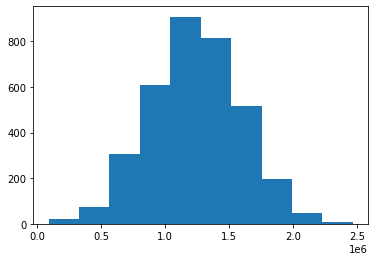

In [56]:
plt.hist(y_train1)

**Import train_test_split function from scikit-learn**

In [26]:
# import library 
from sklearn.model_selection import train_test_split


**Create X and y train and test splits in one command using a split ratio and a random seed**

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

**Check the size and shape of train/test splits (it should be in the ratio as per test_size parameter above)**

In [33]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (3500, 5)
Test feature set size: (1500, 5)
Training variable set size: (3500,)
Test variable set size: (1500,)


### Model fit and training

**Import linear regression model estimator from scikit-learn and instantiate**

In [34]:
#import Linear regression and metric
from sklearn.linear_model import LinearRegression

In [35]:
lm =LinearRegression()

**Fit the model on to the instantiated object itself**

In [36]:

# Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable
lm.fit(X_train, y_train)

LinearRegression()

**Check the intercept and coefficients and put them in a DataFrame**

In [38]:
#Intercept
print("The intercept term of the linear model: ",lm.intercept_)

The intercept term of the linear model:  -2639331.0234630047


In [42]:
#coeeficient
print("The coefficients of the linear model: ",lm.coef_)

The coefficients of the linear model:  [2.16360606e+01 1.65023514e+05 1.20395668e+05 1.91177265e+03
 1.52614387e+01]


In [25]:
#cdf
#prepare a dataframe like tgis (optonal)


,Coefficients
Avg. Area Income,21.597602
Avg. Area House Age,165201.104954
Avg. Area Number of Rooms,119061.463868
Avg. Area Number of Bedrooms,3212.585606
Area Population,15.228121


### Calculation of standard errors and t-statistic for the coefficients

In [60]:

# Training error??
#Testing error??
r_squared = lm.score(X_train, y_train)
r_squared

0.9180549167615528

**R-square of the model fit**

In [72]:
from sklearn.metrics import r2_score
print("R-squared value of this fit:",round(r2_score(y_train,test_pred),3))

R-squared value of this fit: 0.918


### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**

In [61]:
predictions = lm.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1500,)


In [71]:
test_pred=lm.predict(X_train)

**Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

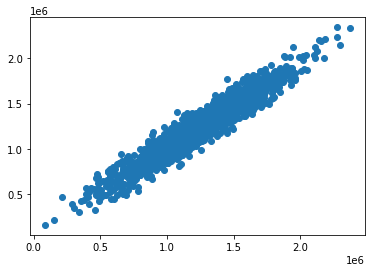

In [63]:
#Plot actual vspredicted
plt.scatter(x=y_test,y=predictions)

**Plotting histogram of the residuals i.e. predicted errors (expect a normally distributed pattern)**

C:\Users\Haritha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Histogram of residuals to check for normality'}, xlabel='Residuals', ylabel='Kernel density'>

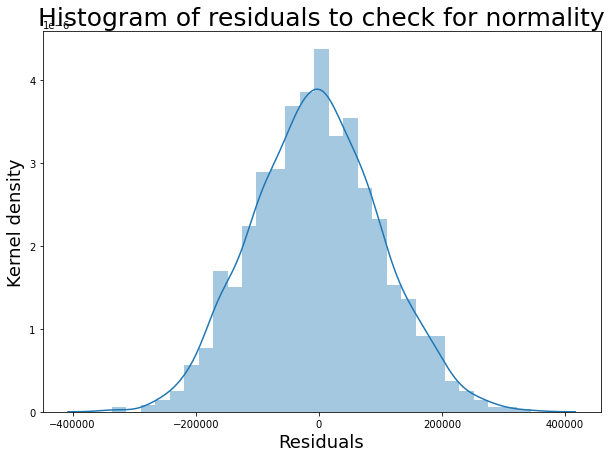

In [33]:
#Residuls plot

**Scatter plot of residuals and predicted values (Homoscedasticity)**

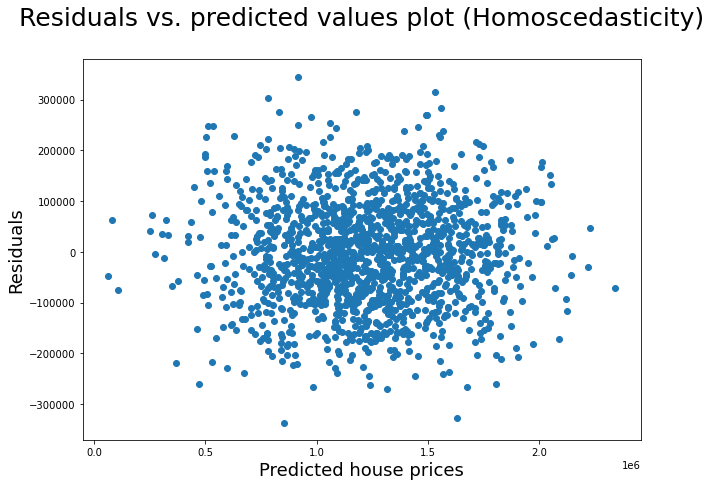

In [35]:
#Residuals vs predicted

**Regression evaluation metrices**

In [36]:
print("Mean absolute error (MAE):",  )
print("Mean square error (MSE):", )
print("Root mean square error (RMSE):", )

Mean absolute error (MAE): 81739.77482718266
Mean square error (MSE): 10489638335.805834
Root mean square error (RMSE): 102418.93543581593


**R-square value**

In [37]:
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

R-squared value of predictions: 0.919
